In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import requests
from pathlib import Path
import numpy as np
import time
import scipy.stats as st
%matplotlib inline
from scipy.stats import linregress


In [3]:
#setting up files that are going to be worked on 
file= Path("data/MORTGAGE30US .csv")
mortgage_rates_csv =pd.read_csv(file)

file_2 = Path("data/median_price_change.csv")
median_price_change_csv = pd.read_csv(file_2)



In [69]:
mortgage_rates_df = pd.DataFrame({"Month of Period End":mortgage_rates_csv["observation_date"],
                                  "Interest Rate": mortgage_rates_csv["MORTGAGE30US"]})
mortgage_rates_df.dropna()

#getting rates starting from 2019
consolidation = mortgage_rates_df.drop([1,2,3,4,6,7,8,9,10,11,13,64,65])
rates_df = consolidation.drop([14,15,16,18,19,20,20,21,22,23,25,26,27,28,30,31,32,33,34,35,37,38,39,40,42,43,44,45,46,47,49,50,51,52,54,55,56,57,58,59,61,62,63])
rates_df

,Month of Period End,Interest Rate
0,1/1/18,4.03
5,6/1/18,4.57
12,1/1/19,4.46
17,6/1/19,3.80
24,1/1/20,3.62
29,6/1/20,3.16
36,1/1/21,2.74
41,6/1/21,2.98
48,1/1/22,3.45
53,6/1/22,5.52


In [70]:
rates_df["Interest Rate"]

0     4.03
5     4.57
12    4.46
17    3.80
24    3.62
29    3.16
36    2.74
41    2.98
48    3.45
53    5.52
60    6.27
Name: Interest Rate, dtype: float64

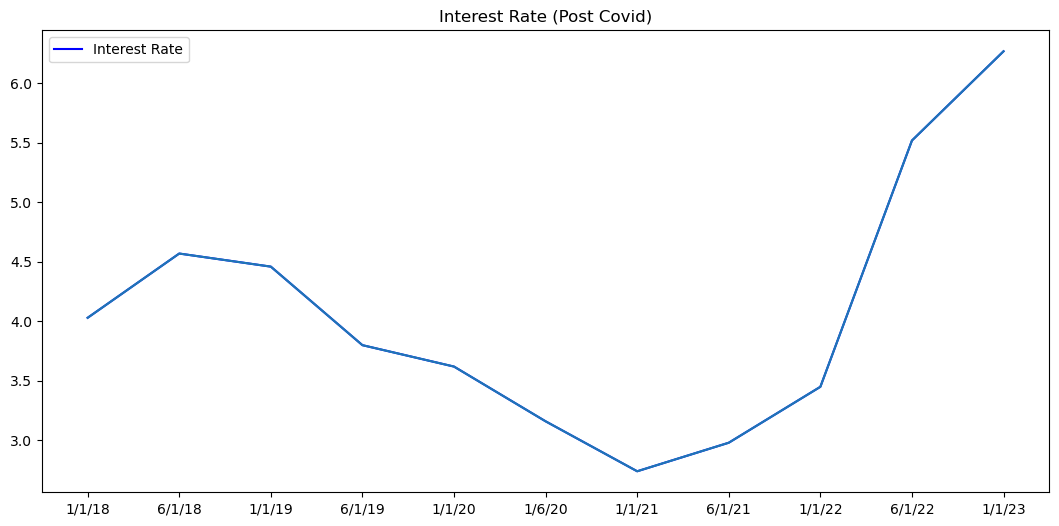

In [100]:
#scatter plot for mortgage rates 
selected_years = ['1/1/18', '6/1/18', '1/1/19', '6/1/19','1/1/20','1/6/20', '1/1/21', '6/1/21', '1/1/22', '6/1/22', '1/1/23']
years = [int(year.split('/')[2]) for year in selected_years]


xaxis = selected_years
yaxis = rates_df["Interest Rate"]
plt.figure(figsize=(13,6))
plt.title("Interest Rate (Post Covid)")
int_rate_plot = plt.plot(xaxis,yaxis , color = "Blue", label = "Interest Rate")
plt.legend()


plt.plot(xaxis,yaxis)
plt.show()

In [72]:
#standard regression
selected_years = ['1/1/2018', '6/1/2018', '1/1/2019', '6/1/2019', '1/1/2021', '6/1/2021', '1/1/2022', '6/1/2022', '1/1/2023']
years = [int(year.split('/')[0]) for year in selected_years]

rates = rates_df["Interest Rate"].values.astype(float)

slope, intercept, r_value, p_value, std_err = linregress(years, selected_years)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U8'), dtype('<U8')) -> None

In [ ]:
#Line graph representing increase in mortgage rates over time 


xaxis = rates_df["Month of Period End"]
yaxis = rates_df["Interest Rate"]
plt.figure(figsize=(13,6))



plt.plot(xaxis,yaxis)

In [73]:
#cleaning median_price_change_csv

median_price_change_df = pd.DataFrame({"Month of Period End":median_price_change_csv["observation_date"],
                                       "Los Angeles, CA": median_price_change_csv["Los Angeles, CA metro area"],
                                       "San Francisco, CA": median_price_change_csv["San Francisco, CA"],
                                       "San Jose, CA": median_price_change_csv["San Jose, CA"],
                                       "Seattle, WA": median_price_change_csv["Seattle, WA metro area"],
                                       "Austin, TX": median_price_change_csv["Austin, TX"],
                                       "Denver, CO": median_price_change_csv["Denver, CO"],
                                       "Las Vegas, NV": median_price_change_csv["Las Vegas, NV"],
                                       "Portland, OR": median_price_change_csv["Portland, OR"]})
median_price_change_df.head()

,Month of Period End,"Los Angeles, CA","San Francisco, CA","San Jose, CA","Seattle, WA","Austin, TX","Denver, CO","Las Vegas, NV","Portland, OR"
0,2/1/19,3%,11%,2%,5%,3%,7%,-5%,6%
1,3/1/19,3%,10%,6%,3%,5%,7%,6%,3%
2,4/1/19,1%,-1%,4%,3%,7%,6%,-6%,-3%
3,5/1/19,0%,2%,0%,1%,2%,0%,4%,8%
4,6/1/19,2%,4%,-1%,-2%,1%,-1%,2%,-4%


In [74]:
#Merging data fames 
#mouse_study_complete = pd.merge(mouse_metadata,study_results, how ="outer", on = "Mouse ID")

mortgage_complete = pd.merge(mortgage_rates_df,median_price_change_df, how = "outer", on =  "Month of Period End")
mortgage_complete_df = mortgage_complete.dropna()
mortgage_complete_df_consolidated = mortgage_complete_df.drop([14,15,16,18,19,20,20,21,22,23,25,26,27,28,30,31,32,33,34,35,37,38,39,40,42,43,44,45,46,47,49,50,51,52,54,55,56,57,58,59,61,62,63])
mortgage_complete_df_consolidated

,Month of Period End,Interest Rate,"Los Angeles, CA","San Francisco, CA","San Jose, CA","Seattle, WA","Austin, TX","Denver, CO","Las Vegas, NV","Portland, OR"
13,2/1/19,4.37,3%,11%,2%,5%,3%,7%,-5%,6%
17,6/1/19,3.80,2%,4%,-1%,-2%,1%,-1%,2%,-4%
24,1/1/20,3.62,-2%,3%,1%,-4%,-2%,0%,-5%,0%
29,6/1/20,3.16,5%,12%,-1%,7%,2%,2%,4%,5%
36,1/1/21,2.74,0%,-4%,4%,1%,0%,-6%,0%,0%
41,6/1/21,2.98,2%,4%,2%,0%,1%,0%,5%,-2%
48,1/1/22,3.45,-2%,-8%,2%,-1%,3%,-7%,1%,0%
53,6/1/22,5.52,-1%,-6%,-7%,-5%,-8%,4%,1%,-5%
60,1/1/23,6.27,-2%,-13%,-1%,1%,0%,-1%,2%,-3%


In [75]:
#Finding Max and Mins to see if there is correlation 
max_interest = mortgage_complete_df["Interest Rate"].max()
max_price_change_la = mortgage_complete_df["Los Angeles, CA"].max()
max_price_change_sf = mortgage_complete_df["San Francisco, CA"].max()
max_price_change_sj = mortgage_complete_df["San Jose, CA"].max()
max_price_change_sea = mortgage_complete_df["Seattle, WA"].max()
max_price_change_atx = mortgage_complete_df["Austin, TX"].max()
max_price_change_den = mortgage_complete_df["Denver, CO"].max()
max_price_change_lv = mortgage_complete_df["Las Vegas, NV"].max()
max_price_change_po = mortgage_complete_df["Portland, OR"].max()

maxes_df = pd.DataFrame({"Month of Period End":mortgage_complete_df["Month of Period End"],
                         "Max Interest":max_interest,
                         "Max Price Change LA": max_price_change_la,
                         "Max Price Change SF": max_price_change_sf,
                         "Max Price Change SJ": max_price_change_sj,
                         "Max Price Change SEA": max_price_change_sea,
                         "Max Price Change ATX ": max_price_change_atx})
                         
                     
maxes_df.head(1)

,Month of Period End,Max Interest,Max Price Change LA,Max Price Change SF,Max Price Change SJ,Max Price Change SEA,Max Price Change ATX
13,2/1/19,6.9,7%,9%,9%,8%,9%


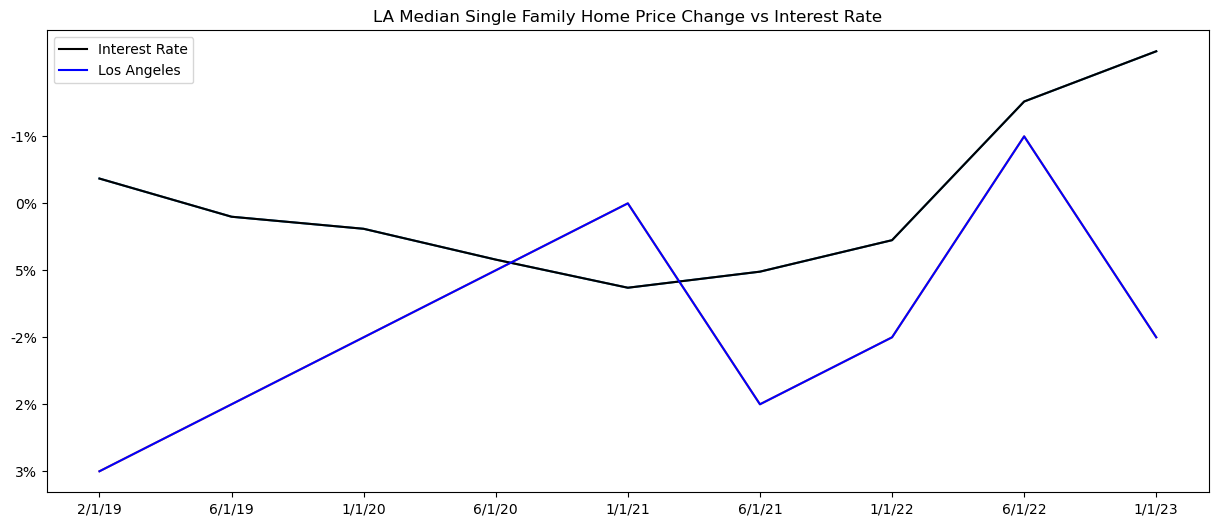

In [109]:
#plotting median_price_change_df. LA vs Interest Rates 

x_axis = mortgage_complete_df_consolidated["Month of Period End"]
y_axis = mortgage_complete_df_consolidated["Interest Rate"]
y_axis_2 = mortgage_complete_df_consolidated["Los Angeles, CA"].astype('str')


plt.figure(figsize=(15,6))

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_2)
plt.title("LA Median Single Family Home Price Change vs Interest Rate")

int_rate_plot = plt.plot(x_axis,y_axis , color = "Black", label = "Interest Rate")
int_rate_plot_2 = plt.plot(x_axis,y_axis_2 , color = "Blue", label = "Los Angeles")
plt.legend()



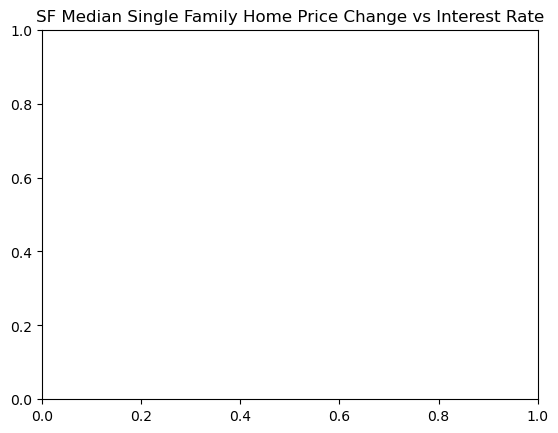

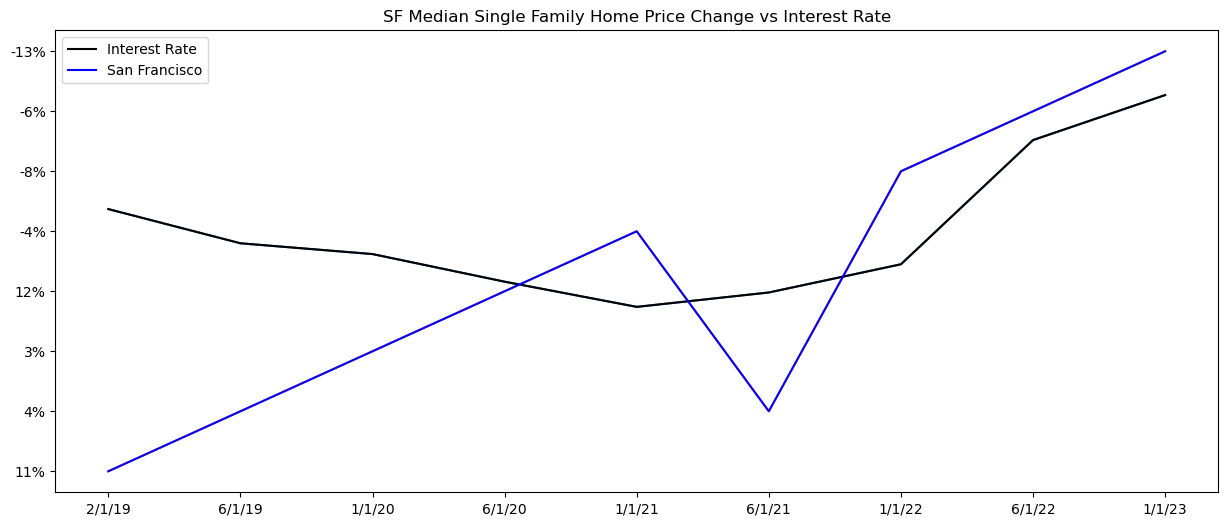

In [114]:
#SF vs Interest Rates 

x_axis = mortgage_complete_df_consolidated["Month of Period End"]
y_axis = mortgage_complete_df_consolidated["Interest Rate"]
y_axis_2 = mortgage_complete_df_consolidated["San Francisco, CA"].astype('str')
plt.title("SF Median Single Family Home Price Change vs Interest Rate")
plt.figure(figsize=(15,6))
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_2)

plt.title("SF Median Single Family Home Price Change vs Interest Rate")
int_rate_plot = plt.plot(x_axis,y_axis , color = "Black", label = "Interest Rate")
int_rate_plot_2 = plt.plot(x_axis,y_axis_2 , color = "Blue", label = "San Francisco")
plt.legend()



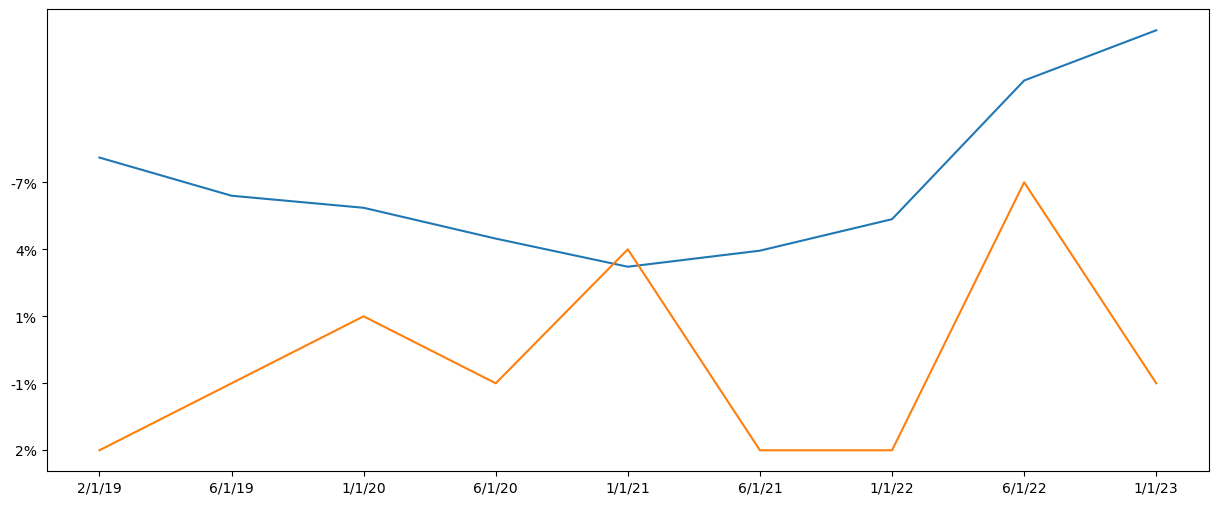

In [78]:
#San Jose, CA vs Interest Rates 

x_axis = mortgage_complete_df_consolidated["Month of Period End"]
y_axis = mortgage_complete_df_consolidated["Interest Rate"]
y_axis_2 = mortgage_complete_df_consolidated["San Jose, CA"].astype('str')
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_2)
plt.title("LA Median Single Family Home Price Change vs Interest Rate")


plt.figure(figsize=(15,6))

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_2)

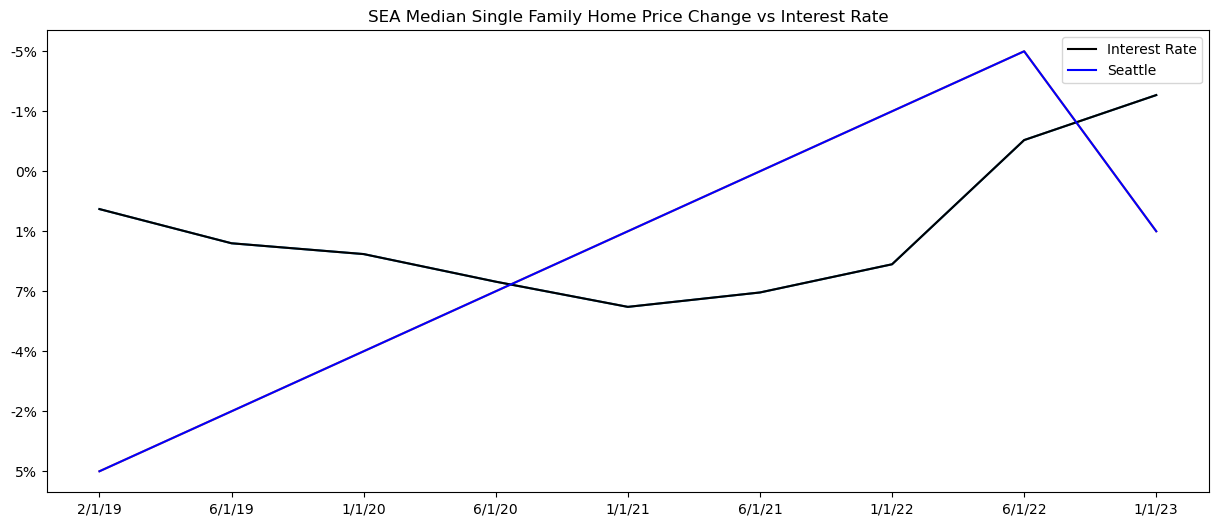

In [117]:
#Seattle, WA vs interest rates
x_axis = mortgage_complete_df_consolidated["Month of Period End"]
y_axis = mortgage_complete_df_consolidated["Interest Rate"]
y_axis_2 = mortgage_complete_df_consolidated["Seattle, WA"].astype('str')


plt.figure(figsize=(15,6))

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_2)
plt.title("SEA Median Single Family Home Price Change vs Interest Rate")

int_rate_plot = plt.plot(x_axis,y_axis , color = "Black", label = "Interest Rate")
int_rate_plot_2 = plt.plot(x_axis,y_axis_2 , color = "Blue", label = "Seattle")
plt.legend()

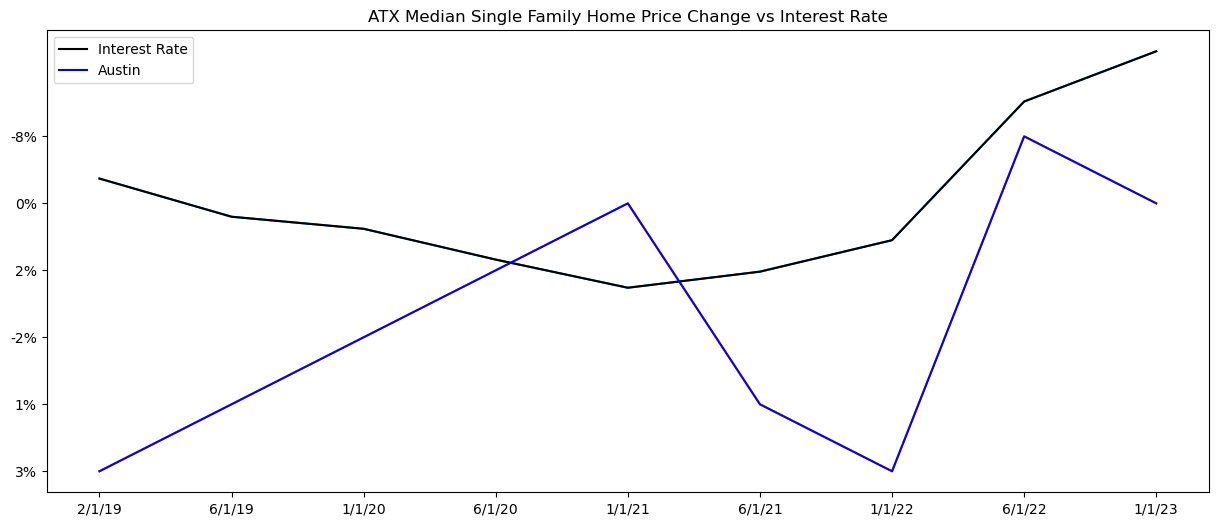

In [130]:
#Austin, TX	 vs interest rates
x_axis = mortgage_complete_df_consolidated["Month of Period End"]
y_axis = mortgage_complete_df_consolidated["Interest Rate"]
y_axis_2 = mortgage_complete_df_consolidated["Austin, TX"].astype('str')

plt.figure(figsize=(15,6))


plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_2)
plt.title("ATX Median Single Family Home Price Change vs Interest Rate")

int_rate_plot = plt.plot(x_axis,y_axis , color = "Black", label = "Interest Rate")
int_rate_plot_2 = plt.plot(x_axis,y_axis_2 , color = "Blue", label = "Austin")
plt.legend()


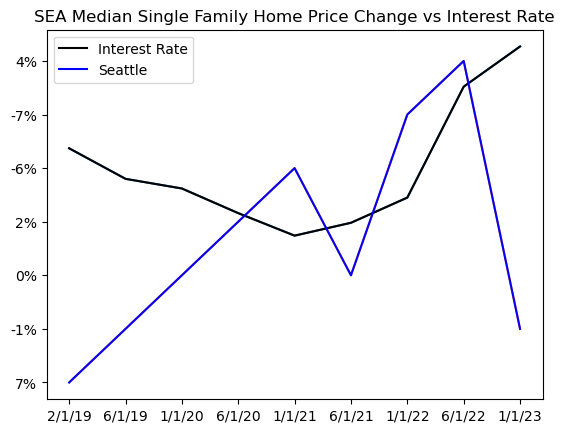

In [118]:
#Denver, CO vs interest rates
x_axis = mortgage_complete_df_consolidated["Month of Period End"]
y_axis = mortgage_complete_df_consolidated["Interest Rate"]
y_axis_2 = mortgage_complete_df_consolidated["Denver, CO"].astype('str')


plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_2)
plt.title("SEA Median Single Family Home Price Change vs Interest Rate")

int_rate_plot = plt.plot(x_axis,y_axis , color = "Black", label = "Interest Rate")
int_rate_plot_2 = plt.plot(x_axis,y_axis_2 , color = "Blue", label = "Seattle")
plt.legend()

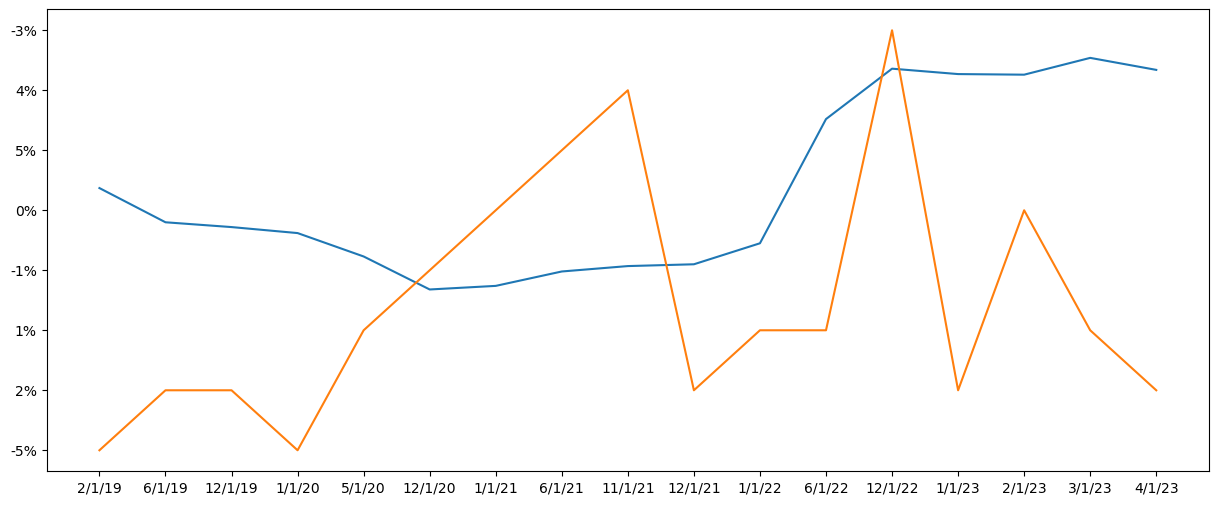

In [20]:
#Las Vegas, NV vs interest rates
x_axis = mortgage_complete_df_consolidated["Month of Period End"]
y_axis = mortgage_complete_df_consolidated["Interest Rate"]
y_axis_2 = mortgage_complete_df_consolidated["Las Vegas, NV"].astype('str')


plt.figure(figsize=(15,6))

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_2)

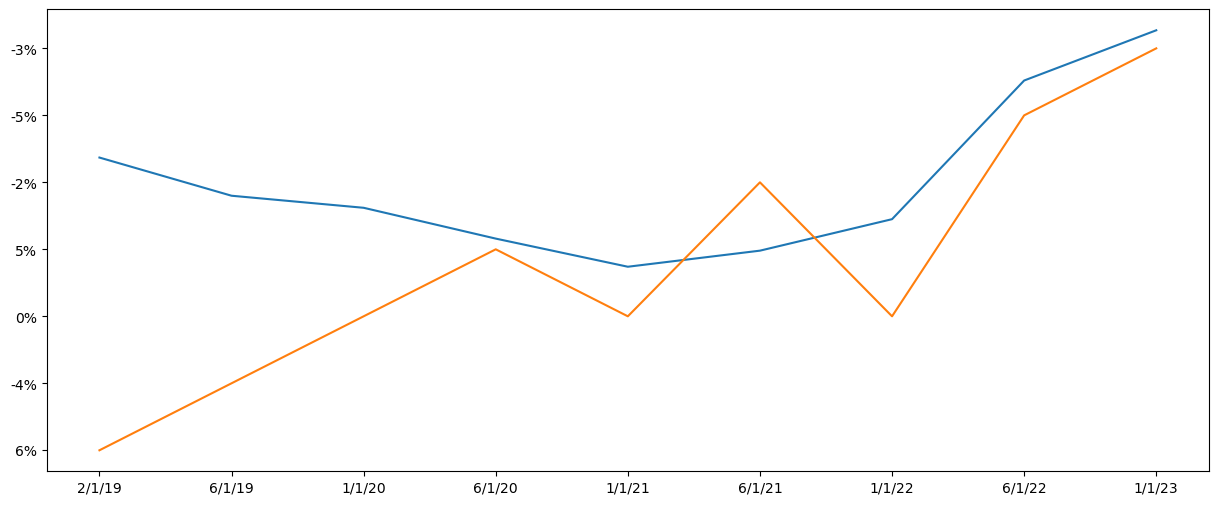

In [91]:
#Portland, OR vs interest rates
x_axis = mortgage_complete_df_consolidated["Month of Period End"]
y_axis = mortgage_complete_df_consolidated["Interest Rate"]
y_axis_2 = mortgage_complete_df_consolidated["Portland, OR"].astype('str')


plt.figure(figsize=(15,6))

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_2)

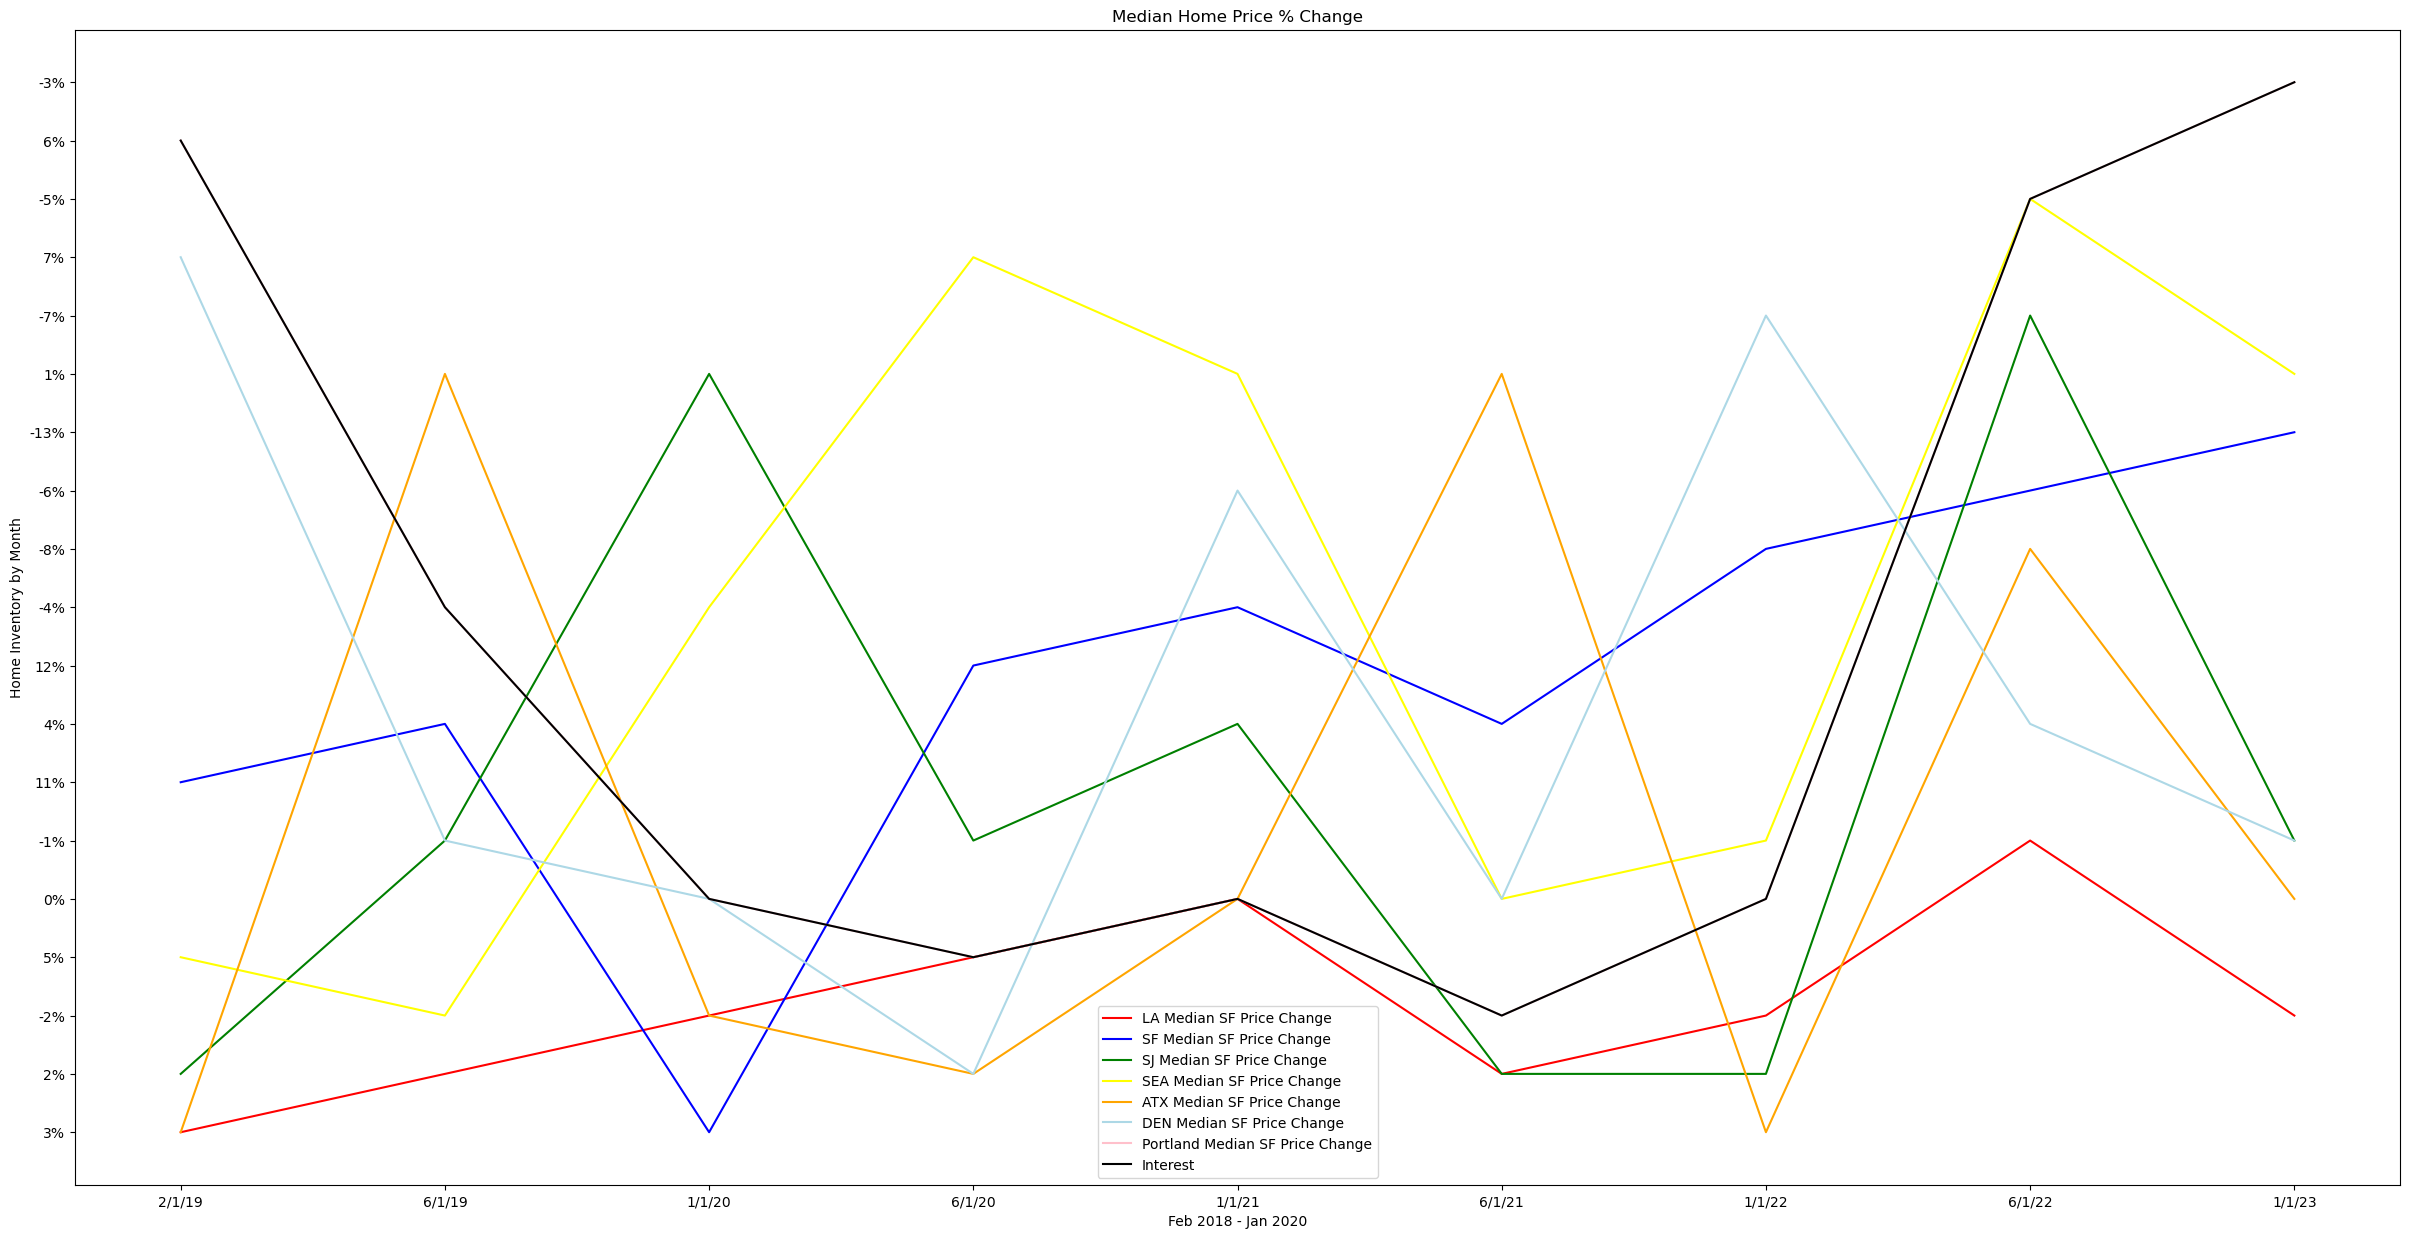

In [43]:
#line graph that includes all cities compared to interest rate 

#time period I selected, sliced time frame to biannualy 
period = mortgage_complete_df_consolidated["Month of Period End"]

interest = mortgage_complete_df_consolidated["Interest Rate"]

#selecting city data 
la = mortgage_complete_df_consolidated["Los Angeles, CA"].astype('str')
sf = mortgage_complete_df_consolidated["San Francisco, CA"].astype('str')
sj = mortgage_complete_df_consolidated["San Jose, CA"].astype('str')
sea = mortgage_complete_df_consolidated["Seattle, WA"].astype('str')
atx = mortgage_complete_df_consolidated["Austin, TX"].astype('str')
den = mortgage_complete_df_consolidated["Denver, CO"].astype('str')
lv = mortgage_complete_df_consolidated["Las Vegas, NV"].astype('str')
po = mortgage_complete_df_consolidated["Portland, OR"].astype('str')
IR = mortgage_complete_df_consolidated["Interest Rate"]

plt.figure(figsize=(30,15))


la_plot = plt.plot(period, la, color = 'red', label = "LA Median SF Price Change")
sf_plot = plt.plot(period, sf, color = 'blue', label = "SF Median SF Price Change")
sj_plot = plt.plot(period, sj, color = 'green', label = "SJ Median SF Price Change")
sea_plot = plt.plot(period, sea, color = 'yellow', label = "SEA Median SF Price Change")
atx_plot = plt.plot(period, atx, color = 'orange', label = "ATX Median SF Price Change")
den_plot = plt.plot(period, den, color = 'lightblue', label = "DEN Median SF Price Change")
po_plot = plt.plot(period, po, color = 'pink', label = "Portland Median SF Price Change")
interest_plot = plt.plot(period, po, color = 'black', label = "Interest")


plt.legend()
plt.title("Median Home Price % Change")
plt.xlabel("Feb 2018 - Jan 2020")
plt.ylabel("Home Inventory by Month")
plt.show()